In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\/bin/'

In [7]:
loans = pd.read_csv('loans.csv')

In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [13]:
loans.shape

(9578, 14)

In [15]:
loans.isna().sum() # 누락 값 확인, ays.with.cr.line    29 등 그 수가 미세하여 그냥 버림

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [18]:
loans = loans.dropna()
loans.isna().sum() # 재확인

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [20]:
loans.dtypes #데이터 형식 확인, not.fully.paid(목표값 : 안갚은 사람)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [24]:
loans['not.fully.paid'].mean() # 돈 안갚은 사람의 비율

0.1598360655737705

In [26]:
loans.purpose.value_counts()
# 돈을 빌린 목적의 분포 확인

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

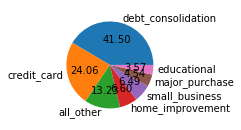

In [33]:
plt.figure(figsize=(2,2))
p = plt.pie(loans.purpose.value_counts(), labels=loans.purpose.unique(),
           autopct='%.2f')

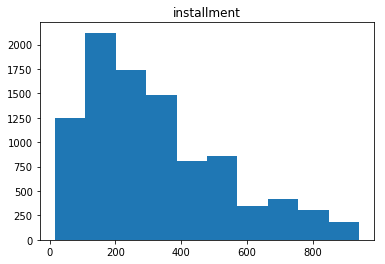

In [38]:
p = plt.hist(loans['installment']) # installment = 월 상환금
p = plt.title('installment')

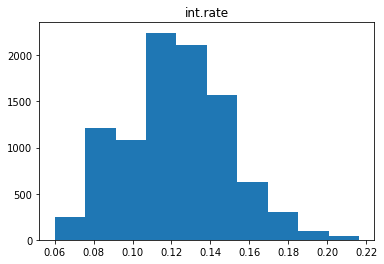

In [40]:
p = plt.hist(loans['int.rate']) # int.rate : 이자율
p = plt.title('int.rate')

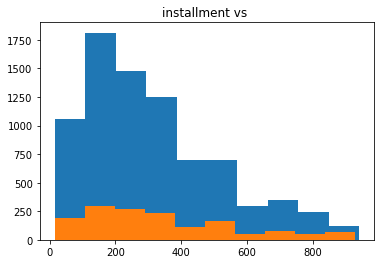

In [44]:
p = plt.hist(loans['installment'][loans['not.fully.paid']==0], label='ok' ) 
p = plt.hist(loans['installment'][loans['not.fully.paid']==1], label='no' ) 
# installment = 월 상환금 ,[] [mask] mask(조건)
# 데이터[조건]
p = plt.title('installment vs ')

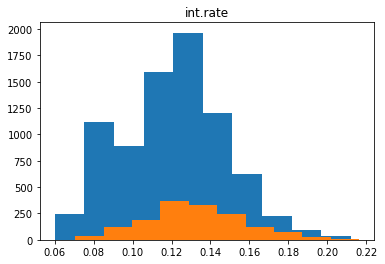

In [46]:
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label='no')
p = plt.title('int.rate')

In [49]:
loans = pd.get_dummies(loans)  # 카테고리를 원핫 인코딩
# -> 머시러닝 조작가능하도록 수치화 됨

In [53]:
X = loans.drop(columns='not.fully.paid')
y = loans['not.fully.paid']

In [54]:
loans.head() 

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,0,1,0,0,0,0,0


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5).fit(X, y)
model.score(X,y)


0.8456284153005464

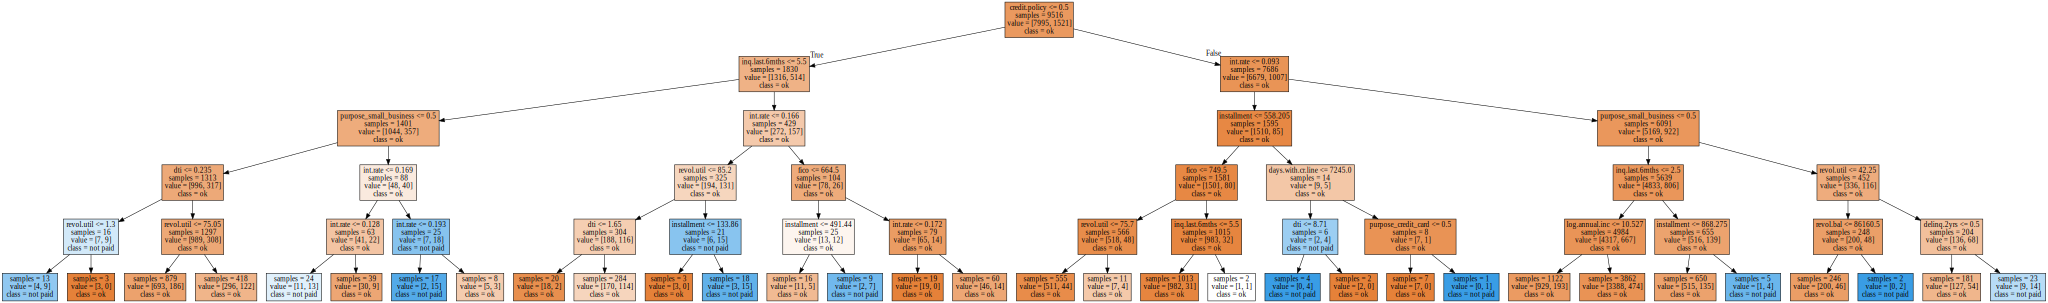

None

In [59]:
# 트리 그림 그리기(파일로 트리를 저장합니다.)
export_graphviz(model, out_file = 'loan.dot', class_names=['ok', 'not paid'], 
               feature_names=X.columns, impurity=False, filled=True)

with open('loan.dot') as f:
    dot_graph = f.read()
g = display(graphviz.Source(dot_graph))
display(g)
# 트리는 남에게 설명하기 좋음